In [44]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [48]:
df = pd.read_csv('C:/Users/Admin/Downloads/archive/IMDB Dataset.csv')

In [49]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [50]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    return ' '.join([word for word in words if word.isalnum() and word not in stop_words])

In [52]:
df['processed_review'] = df['review'].apply(preprocess_text)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=42)

In [54]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [55]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [56]:
y_pred = model.predict(X_test_tfidf)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.18%


In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[4211  750]
 [ 732 4307]]


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

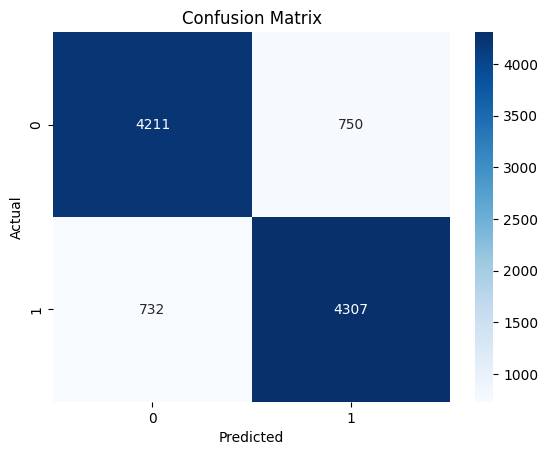

In [60]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])

In [62]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])

In [63]:

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

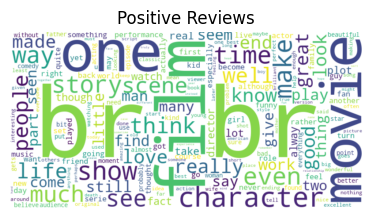

In [64]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

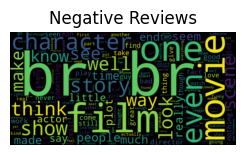

In [65]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')


In [67]:
plt.show()

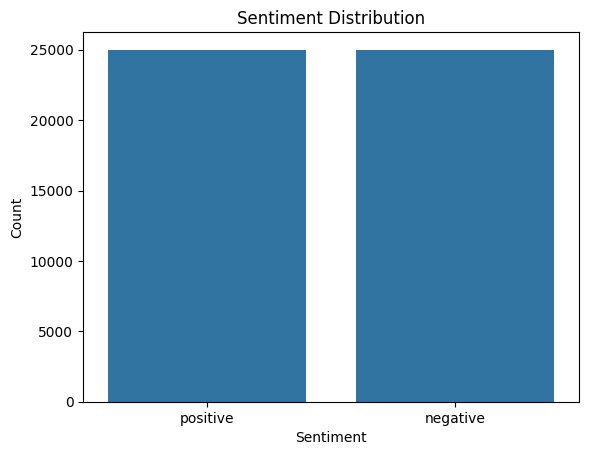

In [70]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [69]:
sentiment_counts = df['sentiment'].value_counts()

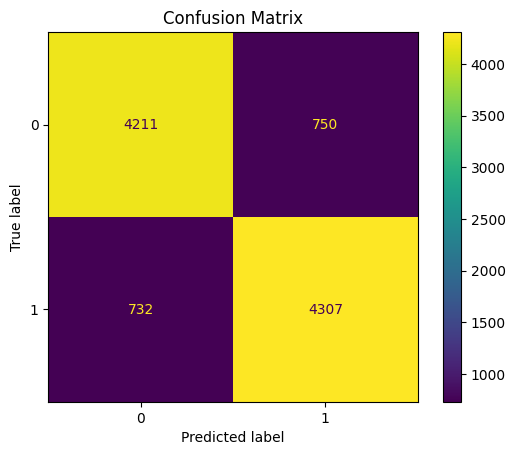

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from wordcloud import WordCloud

# Combine all reviews into one string
all_reviews = ' '.join(df['processed_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [ ]:
import numpy as np

# Create a scatter plot for true vs. predicted sentiments
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='True', alpha=0.5)
plt.scatter(y_test.index, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('True vs Predicted Sentiments')
plt.xlabel('Sample Index')
plt.ylabel('Sentiment')
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

# Create an interactive scatter plot for true vs. predicted sentiments
fig = px.scatter(x=y_test.index, y=y_test, color=y_pred, labels={'x':'Sample Index', 'y':'Sentiment'},
                 title='Interactive Scatter Plot of True vs Predicted Sentiments')
fig.show()


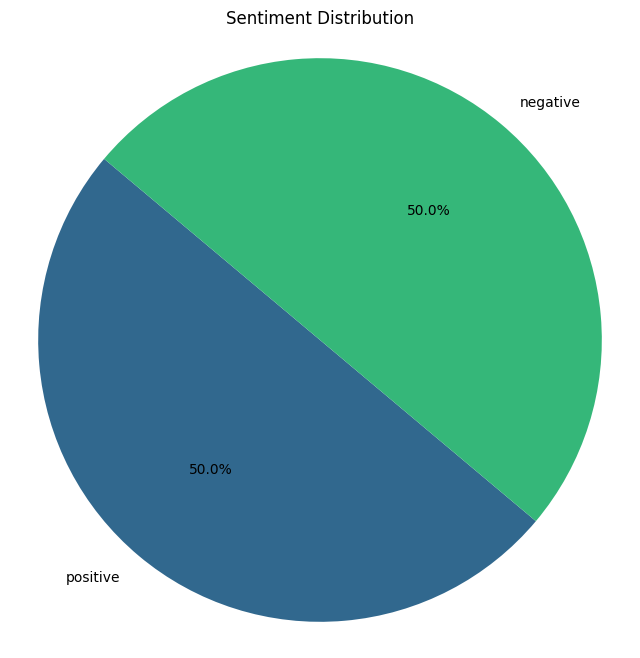

In [75]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sentiment_counts)))
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


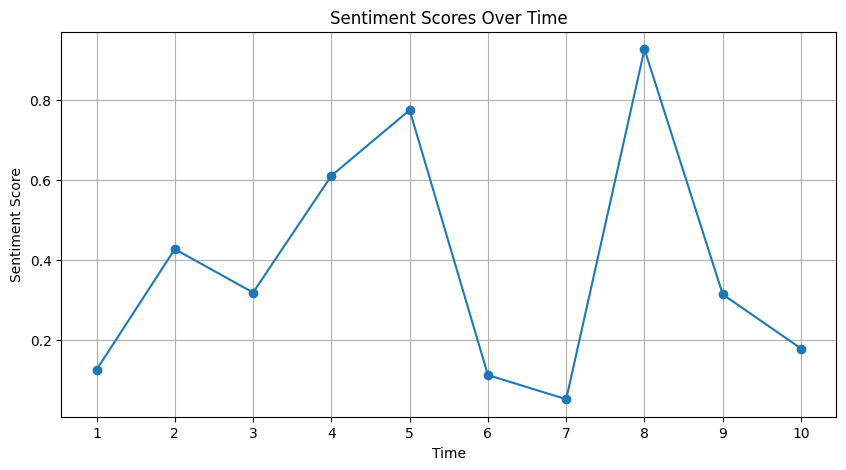

In [76]:
# Sample DataFrame for line plot
import numpy as np

time = np.arange(1, 11)
sentiment_scores = np.random.rand(10)  # Random sentiment scores

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(time, sentiment_scores, marker='o', linestyle='-')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.xticks(time)
plt.grid()
plt.show()


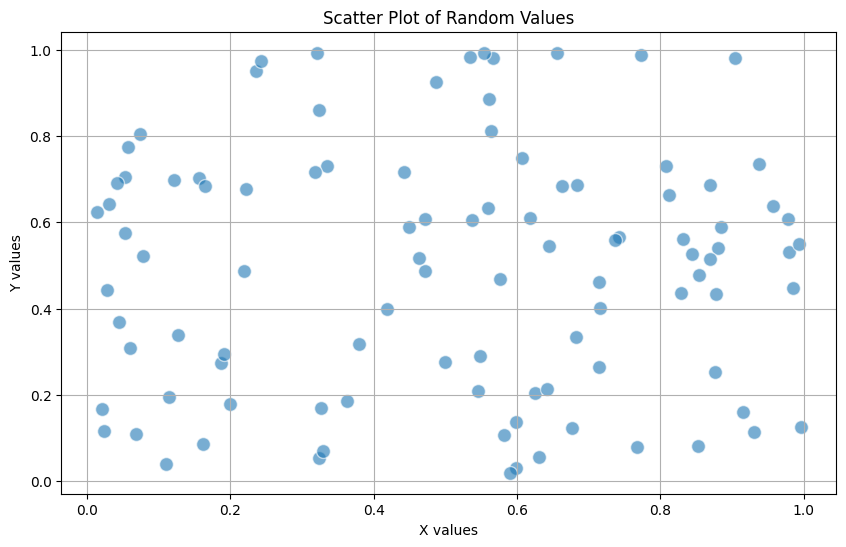

In [77]:
# Sample DataFrame for scatter plot
x = np.random.rand(100)
y = np.random.rand(100)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Random Values')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8328\3838259773.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='scores', data=df, palette='Set2')


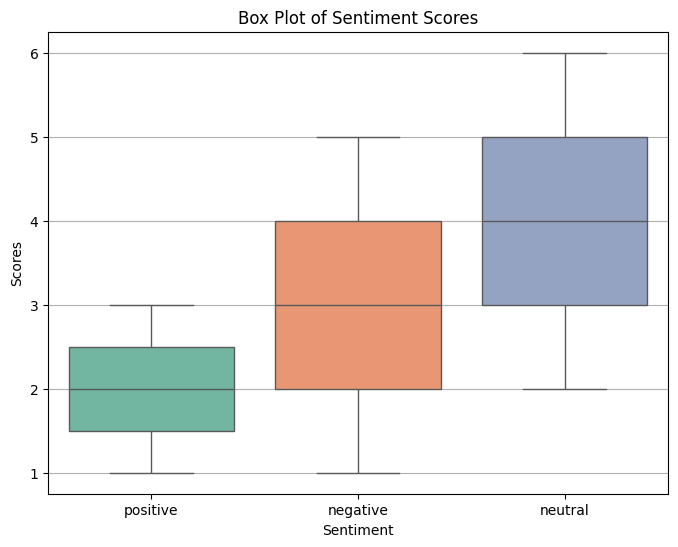

In [78]:
# Sample DataFrame for box plot
data = {
    'sentiment': ['positive', 'positive', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral'],
    'scores': [1, 2, 3, 1, 2, 3, 5, 6]
}
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='scores', data=df, palette='Set2')
plt.title('Box Plot of Sentiment Scores')
plt.ylabel('Scores')
plt.xlabel('Sentiment')
plt.grid(axis='y')
plt.show()
